<a href="https://colab.research.google.com/github/Srii126/39_Srilakshmi/blob/main/Basic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas scikit-learn matplotlib seaborn transformers kaggle --quiet


In [2]:
!ls

all-data.csv  sample_data


In [3]:
!unzip -o archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [4]:
import pandas as pd

# Load the dataset, specifying encoding, separator, and header=None as it appears there's no header
df = pd.read_csv('all-data.csv', encoding='ISO-8859-1', sep=',', header=None)

# Manually assign column names
df.columns = ['sentiment', 'text']

print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Information:")
df.info()
print("\nDistribution of Sentiment Labels:")
print(df['sentiment'].value_counts())

First 5 rows of the DataFrame:
  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB

Distribution of Sentiment Labels:
sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Map sentiment labels to numerical values
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])
print("Sentiment Label Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# 2. Split the dataset into training and testing sets
X = df['text']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for practicality
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nShape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Sentiment Label Mapping:
negative: 0
neutral: 1
positive: 2

Shape of X_train: (3876,)
Shape of X_test: (970,)
Shape of y_train: (3876,)
Shape of y_test: (970,)

Shape of X_train_tfidf: (3876, 5000)
Shape of X_test_tfidf: (970, 5000)



Training Logistic Regression model...
Model training complete.

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.78      0.45      0.57       121
     neutral       0.76      0.92      0.83       576
    positive       0.70      0.52      0.60       273

    accuracy                           0.75       970
   macro avg       0.75      0.63      0.67       970
weighted avg       0.75      0.75      0.73       970



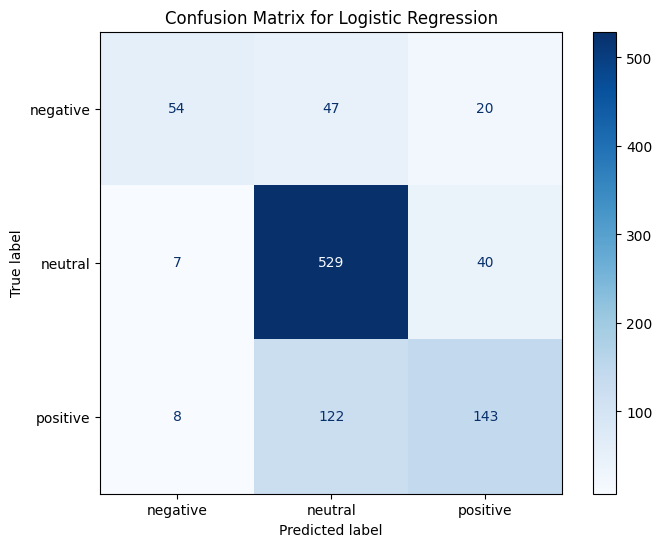

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Initialize a Logistic Regression model
# Set max_iter to a sufficiently large number to ensure convergence
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the Logistic Regression model
print("\nTraining Logistic Regression model...")
log_reg_model.fit(X_train_tfidf, y_train)
print("Model training complete.")

# 3. Make predictions on the test set
y_pred = log_reg_model.predict(X_test_tfidf)

# 4. Print a classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 5. Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for Logistic Regression')
plt.show()